In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# set the random number generator
np.random.seed(7)

In [52]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')
    
step()    

TypeError: step() missing 3 required positional arguments: 'state', 'p1', and 'p2'

In [29]:
def run_simulation(state, p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    results = TimeSeries()    
    for i in range(num_steps):
        step(state, p1, p2)
        results[i] = state.olin
        
    plot(results, label='Olin')

In [30]:
bikeshare1 = State(olin=10, wellesley=2)

,values
olin,10
wellesley,2


In [31]:
bikeshare2 = State(olin=2, wellesley=10)

,values
olin,2
wellesley,10


In [32]:
bike_to_olin(bikeshare1)

In [33]:
bike_to_wellesley(bikeshare2)

In [34]:
bikeshare1

,values
olin,11
wellesley,1


In [35]:
bikeshare2

,values
olin,1
wellesley,11


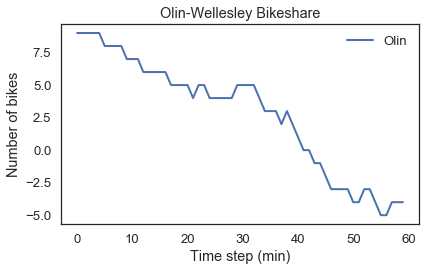

In [36]:
bikeshare = State(olin=10, wellesley=2)
run_simulation(bikeshare, 0.4, 0.2, 60)
decorate_bikeshare()

In [37]:
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        return
    state.wellesley -= 1
    state.olin += 1

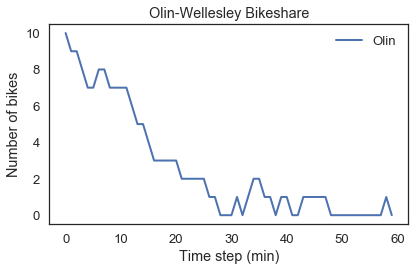

In [38]:
bikeshare = State(olin=10, wellesley=2)
run_simulation(bikeshare, 0.4, 0.2, 60)
decorate_bikeshare()

In [39]:
x = 5

5

In [40]:
x == 5

True

In [41]:
if x == 5:
    print('yes, x is 5')

yes, x is 5


In [42]:
# If you remove the # from the if statement and run it, you'll get
# SyntaxError: invalid syntax

#if x = 5:
#    print('yes, x is 5')

In [43]:
bikeshare = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)

,values
olin,10
wellesley,2
olin_empty,0
wellesley_empty,0


In [44]:
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1

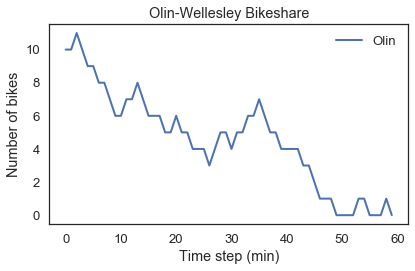

In [45]:
run_simulation(bikeshare, 0.4, 0.2, 60)
decorate_bikeshare()

In [46]:
bikeshare.olin_empty

4

In [47]:
bikeshare.wellesley_empty

0

In [48]:
bikeshare = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0,
                  clock=0)
bikeshare

,values
olin,10
wellesley,2
olin_empty,0
wellesley_empty,0
clock,0


In [90]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
    state.clock += 1


60

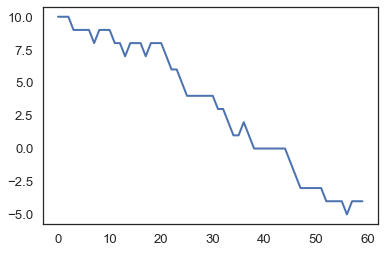

In [97]:
run_simulation(bikeshare, 0.4, 0.2, 60)
bikeshare.clock


In [98]:
bikeshare = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0,
                  clock=0, t_first_empty = -1)

,values
olin,10
wellesley,2
olin_empty,0
wellesley_empty,0
clock,0
t_first_empty,-1


In [107]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
    
    state.clock += 1
    
    if (state.olin_empty > 0 or state.wellesley_empty > 0) and state.t_first_empty == -1:
        state.t_first_empty = state.clock

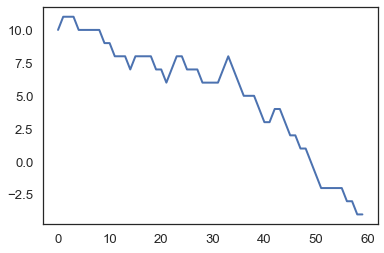

In [108]:
bikeshare = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0,
                  clock=0, t_first_empty = -1)
run_simulation(bikeshare, 0.4, 0.2, 60)


In [109]:
bikeshare

,values
olin,-4
wellesley,16
olin_empty,0
wellesley_empty,0
clock,60
t_first_empty,-1
